# Import all the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Read the dataset from remote machine

In [2]:
A = pd.read_csv("/Users/vipulghare/Desktop/ETL Hive/csvfiles/sidhardhan/Classification/diabetes.csv")

# Preview the dataset

In [3]:
A.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Get information about the dataset

In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Describe function will tell you more about the dataset

In [5]:
A.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Check the collinearity

In [6]:
A.corr()["Outcome"].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

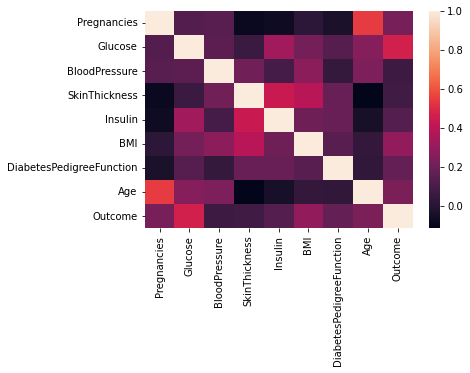

In [7]:
sb.heatmap(A.corr())

# Drop unnecessary columns

In [8]:
cat=[]
con=[]
for i in A.columns:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

[]

In [10]:
con

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

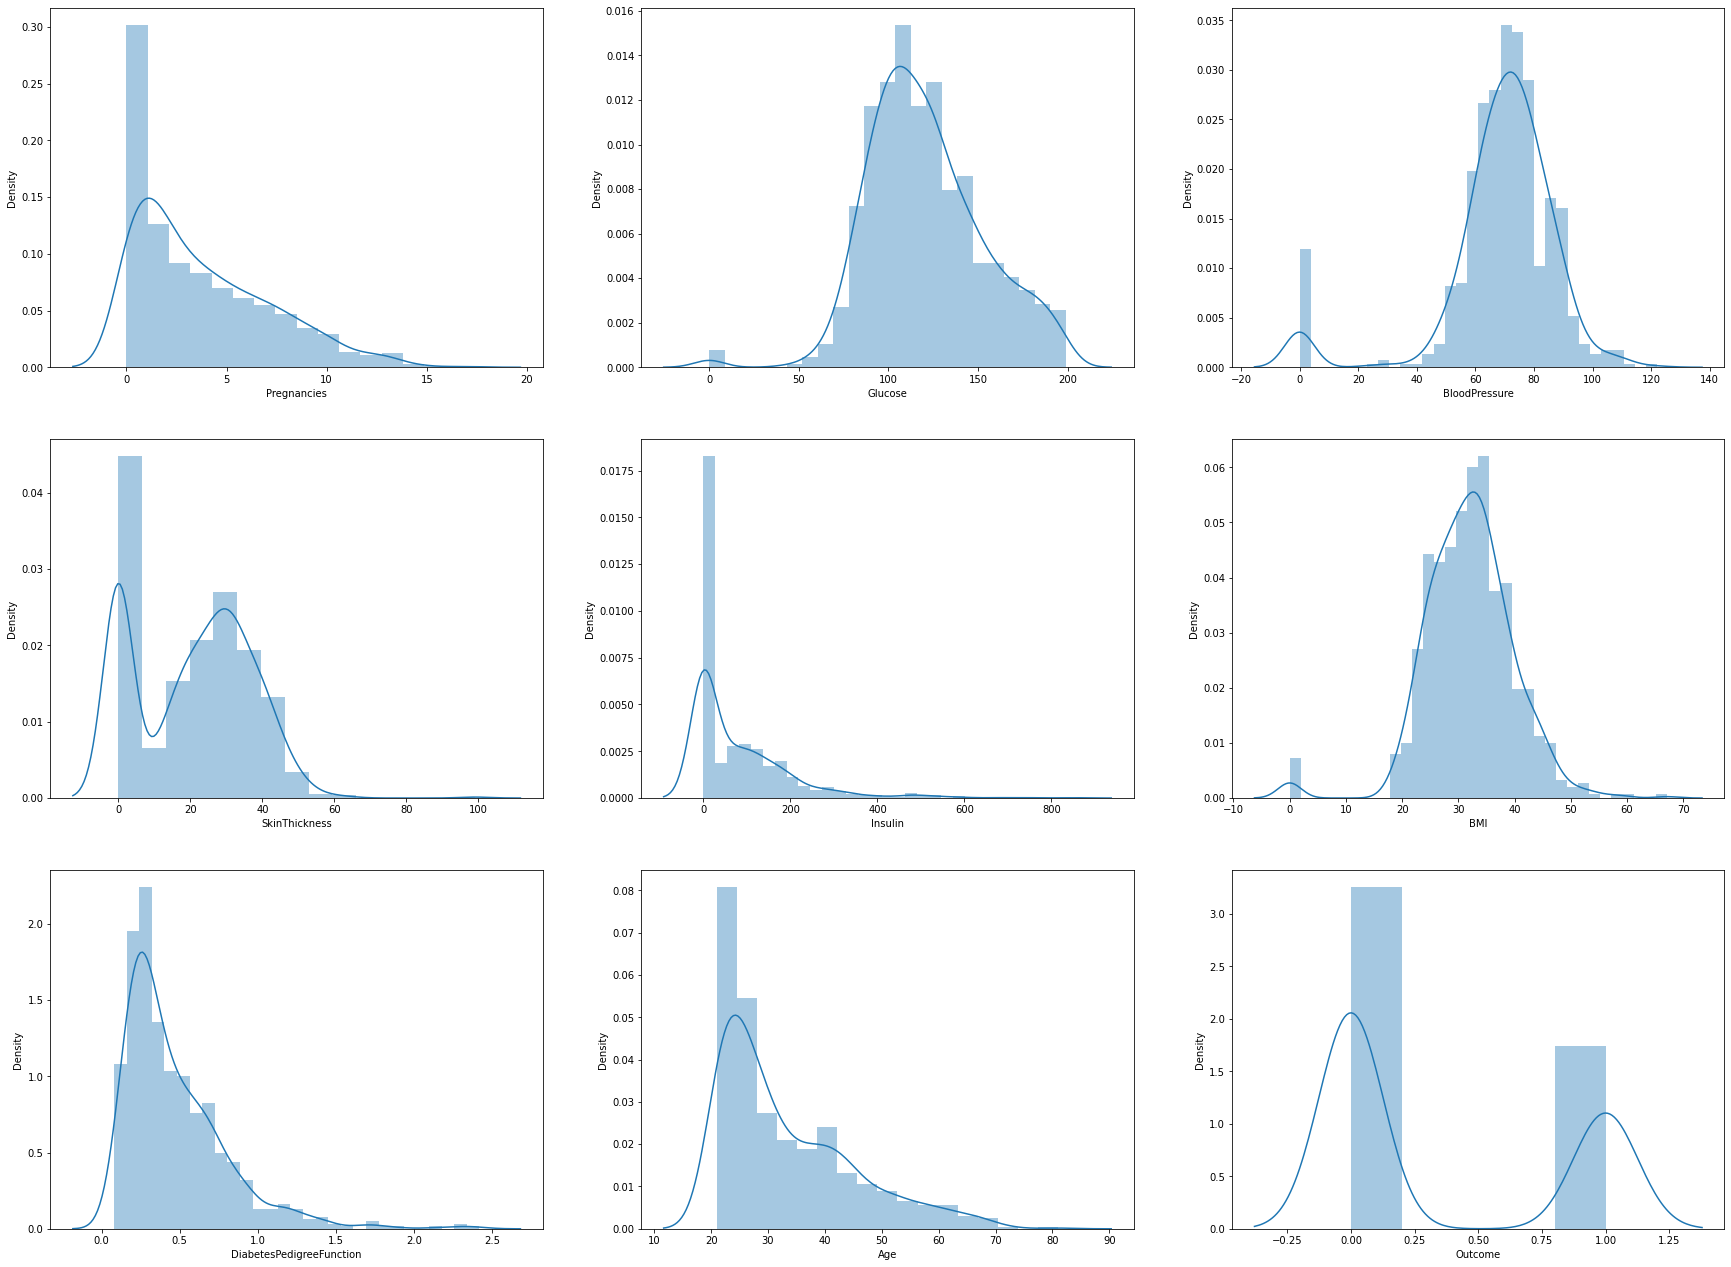

In [11]:
plt.figure(figsize=(30,70))
m = 1
for i in A.columns:
    plt.subplot(A.shape[1],3,m)
    if(A[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [12]:
X = A.drop(labels=["Outcome"],axis=1)

# Exploratory Data Analysis

In [ ]:
plt.figure(figsize=(15,40))
m = 1
for i in X.columns:
    plt.subplot(len(X.columns),3,m)
    sb.boxplot(A.Outcome,X[i])
    m = m + 1

# Handling Outliers

In [ ]:
plt.figure(figsize=(15,40))
m = 1
for i in X.columns:
    plt.subplot(len(X.columns),3,m)
    sb.boxplot(A.Outcome,X[i])
    m = m + 1

In [ ]:
A.columns

In [ ]:
q1 = A.describe()["DiabetesPedigreeFunction"][4]
q3 = A.describe()["DiabetesPedigreeFunction"][6]
IQR = q3-q1
part = IQR/2
upper_limit = IQR + part
lower_limit = IQR - part
A = A[(A.DiabetesPedigreeFunction < upper_limit) & (A.DiabetesPedigreeFunction > lower_limit)]

In [ ]:
A

In [ ]:
plt.figure(figsize=(15,40))
m = 1
for i in X.columns:
    plt.subplot(len(X.columns),3,m)
    sb.boxplot(A.Outcome,X[i])
    m = m + 1

# Checking skew

In [ ]:
plt.figure(figsize=(30,70))
m = 1
for i in X.columns:
    plt.subplot(X.shape[1],3,m)
    if(X[i].dtypes=="object"):
        sb.countplot(A[i])
    else:
        sb.distplot(A[i])
    m = m + 1

In [ ]:
for i in X:
    print(i,X[i].skew())

In [ ]:
X["Pregnancies"].min()

In [ ]:
for i in X:
    print(i,X[i].min())

In [ ]:
Q = []
for i in A.Pregnancies:
    if (i == 0):
        a = 0.000001
        Q.append(a)
    else:
        Q.append(i)

In [ ]:
A["Pregnancies"] = Q

In [ ]:
Q = []
for i in A.Insulin:
    if (i == 0):
        a = 0.000001
        Q.append(a)
    else:
        Q.append(i)

In [ ]:
A["Insulin"] = Q

In [ ]:
for i in X:
    print(i,X[i].min())

In [ ]:
A["Insulin"] = np.log(A["Insulin"])

In [ ]:
A["Age"] = np.log(A["Age"])

In [ ]:
A

In [ ]:
for i in X:
    print(i,X[i].skew())

# Decalare X and Y

In [ ]:
X = A.drop(labels=["Outcome"],axis=1)

In [ ]:
Y = A[["Outcome"]]

# Standarize the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)

In [ ]:
X

# Train test split

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

#  Fitting Multiple Logistic Regression to the Training set

In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)


# Making Predictions

In [ ]:
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)

# Calculation of Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(pred_ts,ytest)*100)
print(accuracy_score(pred_tr,ytrain)*100)
print(confusion_matrix(pred_ts,ytest))